# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [369]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

dirName='output_data'

try:
    # Create target Directory
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ") 
except FileExistsError:
    print("Directory " , dirName ,  " already exists")
    
dirName='Images'

try:
    # Create target Directory
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ") 
except FileExistsError:
    print("Directory " , dirName ,  " already exists")

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



Directory  output_data  Created 
Directory  Images  Created 


## Generate Cities List

In [370]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [371]:
# Loop through the list of cities and perform a request for data on each
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = "&APPID=" + weather_api_key

citi=[]
cloud=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
maxtemp=[]
windspeed=[]
count=1
set_count=1
for city in cities:
    Qcity="q=" + city
    query_url= url + Qcity + api_key
    city_response = requests.get(query_url).json()
    try:
        print(f"Processing Record {count} of set {set_count} | {city}")
        city_response = requests.get(query_url).json()
        citi.append(city_response["name"])
        cloud.append(city_response["clouds"]["all"])
        country.append(city_response["sys"]["country"])
        date.append(city_response["dt"])
        humidity.append(city_response["main"]["humidity"])
        lat.append(city_response["coord"]["lat"])
        lng.append(city_response["coord"]["lon"])
        maxtemp.append(city_response["main"]["temp_max"])
        windspeed.append(city_response["wind"]["speed"])
        if((count%50) == 0):
            time.sleep(2)
            set_count=set_count+1
            count=0
        count=count+1
    except KeyError:
        print("Oops, that key doesn't exist.")
    
weather_data=pd.DataFrame(
    {'City': citi,
     'Cloudiness': cloud,
     'Country': country,
     'Date': date,
     'Humidity': humidity,
     'Lat': lat,
     'Lng': lng,
     'Max Temp': maxtemp,
     'Wind Speed': windspeed
    })


Processing Record 1 of set 1 | donauworth
Processing Record 2 of set 1 | hobart
Processing Record 3 of set 1 | ilulissat
Processing Record 4 of set 1 | moerai
Processing Record 5 of set 1 | illoqqortoormiut
Oops, that key doesn't exist.
Processing Record 5 of set 1 | ponta delgada
Processing Record 6 of set 1 | lebu
Processing Record 7 of set 1 | bathsheba
Processing Record 8 of set 1 | puerto leguizamo
Processing Record 9 of set 1 | plouzane
Processing Record 10 of set 1 | dumai
Processing Record 11 of set 1 | tshikapa
Processing Record 12 of set 1 | dikson
Processing Record 13 of set 1 | huejuquilla el alto
Processing Record 14 of set 1 | blyth
Processing Record 15 of set 1 | port alfred
Processing Record 16 of set 1 | faanui
Processing Record 17 of set 1 | liverpool
Processing Record 18 of set 1 | ushuaia
Processing Record 19 of set 1 | atuona
Processing Record 20 of set 1 | anadyr
Processing Record 21 of set 1 | sakaraha
Processing Record 22 of set 1 | ukiah
Processing Record 23 of

Processing Record 25 of set 4 | adrar
Processing Record 26 of set 4 | yerbogachen
Processing Record 27 of set 4 | pousat
Oops, that key doesn't exist.
Processing Record 27 of set 4 | sibolga
Processing Record 28 of set 4 | labuan
Processing Record 29 of set 4 | flinders
Processing Record 30 of set 4 | weligama
Processing Record 31 of set 4 | aranos
Processing Record 32 of set 4 | dispur
Processing Record 33 of set 4 | bambui
Processing Record 34 of set 4 | vestmanna
Processing Record 35 of set 4 | warqla
Oops, that key doesn't exist.
Processing Record 35 of set 4 | vestmannaeyjar
Processing Record 36 of set 4 | saiha
Processing Record 37 of set 4 | nanortalik
Processing Record 38 of set 4 | nurota
Processing Record 39 of set 4 | genhe
Processing Record 40 of set 4 | chumphon
Processing Record 41 of set 4 | vila franca do campo
Processing Record 42 of set 4 | istok
Processing Record 43 of set 4 | argentan
Processing Record 44 of set 4 | khatanga
Processing Record 45 of set 4 | luderitz


Processing Record 48 of set 7 | yertsevo
Processing Record 49 of set 7 | wattegama
Processing Record 50 of set 7 | yirol
Oops, that key doesn't exist.
Processing Record 50 of set 7 | muhos
Processing Record 1 of set 8 | yigou
Processing Record 2 of set 8 | amarante do maranhao
Processing Record 3 of set 8 | panalingaan
Processing Record 4 of set 8 | murgab
Processing Record 5 of set 8 | camocim
Processing Record 6 of set 8 | makakilo city
Processing Record 7 of set 8 | shingu
Processing Record 8 of set 8 | ziarat
Processing Record 9 of set 8 | jacareacanga
Processing Record 10 of set 8 | kropotkin
Processing Record 11 of set 8 | dickinson
Processing Record 12 of set 8 | half moon bay
Processing Record 13 of set 8 | bull savanna
Processing Record 14 of set 8 | alta floresta
Processing Record 15 of set 8 | saleaula
Oops, that key doesn't exist.
Processing Record 15 of set 8 | port blair
Processing Record 16 of set 8 | fairbanks
Processing Record 17 of set 8 | gondanglegi
Processing Recor

Processing Record 28 of set 11 | kendari
Processing Record 29 of set 11 | urupes
Processing Record 30 of set 11 | nyzy
Processing Record 31 of set 11 | araouane
Processing Record 32 of set 11 | imbituba
Processing Record 33 of set 11 | capinopolis
Processing Record 34 of set 11 | fenoarivo
Processing Record 35 of set 11 | egvekinot
Processing Record 36 of set 11 | pirenopolis
Processing Record 37 of set 11 | moyale
Processing Record 38 of set 11 | bubaque
Processing Record 39 of set 11 | coahuayana
Processing Record 40 of set 11 | general roca
Processing Record 41 of set 11 | kentau
Processing Record 42 of set 11 | qalyub
Processing Record 43 of set 11 | oussouye
Processing Record 44 of set 11 | marrakesh
Processing Record 45 of set 11 | charters towers
Processing Record 46 of set 11 | aflu
Oops, that key doesn't exist.
Processing Record 46 of set 11 | talcahuano
Processing Record 47 of set 11 | pemangkat
Processing Record 48 of set 11 | katsuura
Processing Record 49 of set 11 | kashi


In [374]:
weather_data.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [375]:
#((weather_data["Max Temp"] − 273.15) * 9/5)+ 32
Max_Temp_F=((weather_data["Max Temp"] - 273.15) * 9/5)+32
# Adding Max Temp in Fahrenheit to the Dataframe
weather_data["Max Temp(F)"]=Max_Temp_F
# Writing to a CSV file
weather_data.to_csv (r'output_data/cities.csv', index = False, header=True)

In [376]:
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Max Temp(F)
0,Donauwörth,13,DE,1586679912,71,48.70,10.80,291.48,0.50,64.994
1,Hobart,75,AU,1586679673,67,-42.88,147.33,287.15,4.60,57.200
2,Ilulissat,100,GL,1586679913,60,69.22,-51.10,277.15,10.80,39.200
3,Moerai,16,PF,1586679913,82,-22.43,-151.33,300.47,1.92,81.176
4,Ponta Delgada,40,PT,1586679914,77,37.73,-25.67,288.15,7.20,59.000
...,...,...,...,...,...,...,...,...,...,...
555,Erenhot,0,CN,1586680201,16,43.65,111.98,288.45,3.66,59.540
556,Arrondissement de Rennes,0,FR,1586680201,63,48.17,-1.67,289.82,1.50,62.006
557,Thunder Bay,20,CA,1586679956,74,48.40,-89.32,271.48,2.10,28.994
558,Bourail,68,NC,1586680202,81,-21.57,165.48,296.90,0.65,74.750


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

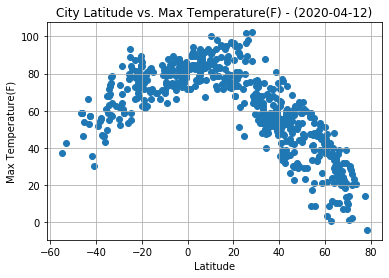

In [377]:
from datetime import datetime
x_values = weather_data["Lat"]
y_values = weather_data["Max Temp(F)"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
Date=datetime.date(datetime.now())
plt.title(f"City Latitude vs. Max Temperature(F) - ({Date})")
plt.grid()
plt.savefig('Images/Latitude_vs_MaxTemperature(F).png')
plt.show()

#### Latitude vs. Humidity Plot

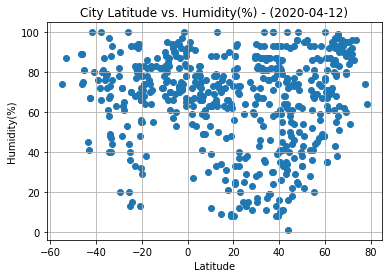

In [378]:
x_values = weather_data["Lat"]
y_values = weather_data["Humidity"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title(f"City Latitude vs. Humidity(%) - ({Date})")
plt.grid()
plt.savefig('Images/Latitude_vs_Humidity(%).png')
plt.show()

#### Latitude vs. Cloudiness Plot

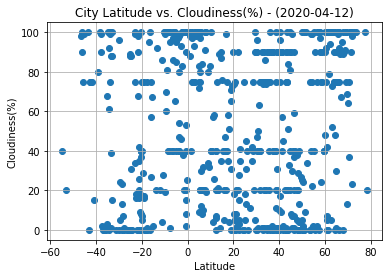

In [379]:
x_values = weather_data["Lat"]
y_values = weather_data["Cloudiness"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title(f"City Latitude vs. Cloudiness(%) - ({Date})")
plt.grid()
plt.savefig('Images/Latitude_vs_Cloudiness(%).png')
plt.show()

#### Latitude vs. Wind Speed Plot

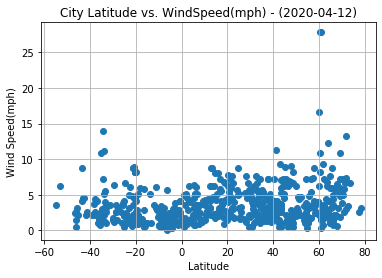

In [380]:
x_values = weather_data["Lat"]
y_values = weather_data["Wind Speed"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title(f"City Latitude vs. WindSpeed(mph) - ({Date})")
plt.grid()
plt.savefig('Images/Latitude_vs_Windspeed(mph).png')
plt.show()

## Linear Regression

In [381]:
# OPTIONAL: Create a function to create Linear Regression plots
def linearegress(hemisphere,x_values,y_values,x_label,y_label):
    correlation = st.pearsonr(x_values,y_values)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    avg_x=sum(x_values)/len(x_values)
    avg_y=sum(y_values)/len(y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")
    plt.annotate(line_eq,(avg_x,avg_y),fontsize=15,color="red")
    plt.title(f"{hemisphere} - {x_label} vs. {y_label} - ({Date})")
    plt.savefig(f"Images/{hemisphere}_{x_label}_{y_label}.png")
    plt.show()

In [382]:
# Create Northern and Southern Hemisphere DataFrames
Northern_Hemisphere=weather_data.loc[weather_data['Lat'] >= 0 ] 
Northern_Hemisphere

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Max Temp(F)
0,Donauwörth,13,DE,1586679912,71,48.70,10.80,291.48,0.50,64.994
2,Ilulissat,100,GL,1586679913,60,69.22,-51.10,277.15,10.80,39.200
4,Ponta Delgada,40,PT,1586679914,77,37.73,-25.67,288.15,7.20,59.000
6,Bathsheba,20,BB,1586679915,74,13.22,-59.52,299.15,8.70,78.800
8,Plouzané,0,FR,1586679916,100,48.38,-4.62,285.15,2.10,53.600
...,...,...,...,...,...,...,...,...,...,...
553,Yima,0,CN,1586680200,17,34.74,111.88,293.58,4.97,68.774
555,Erenhot,0,CN,1586680201,16,43.65,111.98,288.45,3.66,59.540
556,Arrondissement de Rennes,0,FR,1586680201,63,48.17,-1.67,289.82,1.50,62.006
557,Thunder Bay,20,CA,1586679956,74,48.40,-89.32,271.48,2.10,28.994


In [383]:
Southern_Hemisphere=weather_data.loc[weather_data['Lat'] < 0 ] 
Southern_Hemisphere

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Max Temp(F)
1,Hobart,75,AU,1586679673,67,-42.88,147.33,287.15,4.60,57.200
3,Moerai,16,PF,1586679913,82,-22.43,-151.33,300.47,1.92,81.176
5,Lebu,2,CL,1586679914,80,-37.62,-73.65,281.36,4.35,46.778
7,Caucayá,25,CO,1586679915,92,-0.19,-74.78,295.18,0.90,71.654
10,Tshikapa,100,CD,1586679916,57,-6.42,20.80,302.89,1.30,85.532
...,...,...,...,...,...,...,...,...,...,...
539,General Roca,80,AR,1586680191,76,-39.03,-67.58,284.15,2.10,51.800
544,Charters Towers,7,AU,1586680193,29,-20.10,146.27,298.85,2.56,78.260
545,Talcahuano,0,CL,1586680194,87,-36.72,-73.12,281.15,1.00,46.400
554,Ahipara,68,NZ,1586680200,79,-35.17,173.17,293.14,10.93,67.982


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7656312048809888


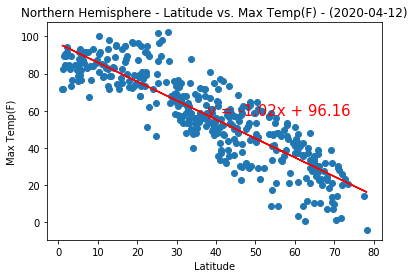

In [384]:
x_values=Northern_Hemisphere["Lat"]
y_values=Northern_Hemisphere["Max Temp(F)"]
x_label="Latitude"
y_label="Max Temp(F)"
Hemisphere="Northern Hemisphere"
linearegress(Hemisphere,x_values,y_values,x_label,y_label)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4560309916557702


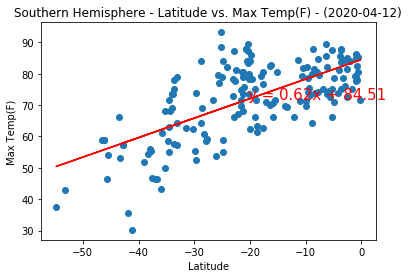

In [385]:
x_values=Southern_Hemisphere["Lat"]
y_values=Southern_Hemisphere["Max Temp(F)"]
x_label="Latitude"
y_label="Max Temp(F)"
Hemisphere="Southern Hemisphere"
linearegress(Hemisphere,x_values,y_values,x_label,y_label)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.030705011490180102


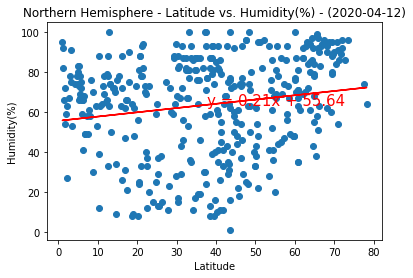

In [386]:
x_values=Northern_Hemisphere["Lat"]
y_values=Northern_Hemisphere["Humidity"]
x_label="Latitude"
y_label="Humidity(%)"
Hemisphere="Northern Hemisphere"
linearegress(Hemisphere,x_values,y_values,x_label,y_label)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.030863928819964127


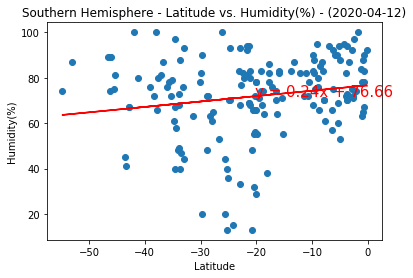

In [387]:
x_values=Southern_Hemisphere["Lat"]
y_values=Southern_Hemisphere["Humidity"]
x_label="Latitude"
y_label="Humidity(%)"
Hemisphere="Southern Hemisphere"
linearegress(Hemisphere,x_values,y_values,x_label,y_label)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01356047883879446


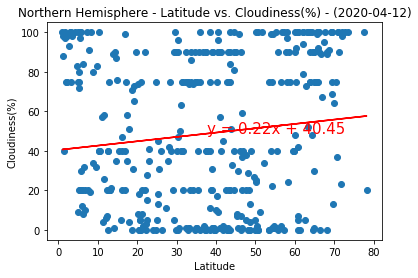

In [388]:
x_values=Northern_Hemisphere["Lat"]
y_values=Northern_Hemisphere["Cloudiness"]
x_label="Latitude"
y_label="Cloudiness(%)"
Hemisphere="Northern Hemisphere"
linearegress(Hemisphere,x_values,y_values,x_label,y_label)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.012968377032308269


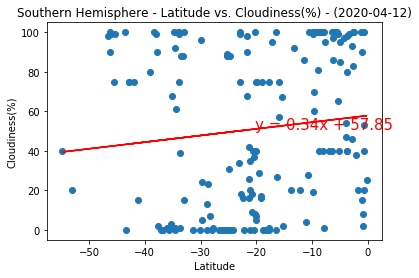

In [389]:
x_values=Southern_Hemisphere["Lat"]
y_values=Southern_Hemisphere["Cloudiness"]
x_label="Latitude"
y_label="Cloudiness(%)"
Hemisphere="Southern Hemisphere"
linearegress(Hemisphere,x_values,y_values,x_label,y_label)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02054244300177362


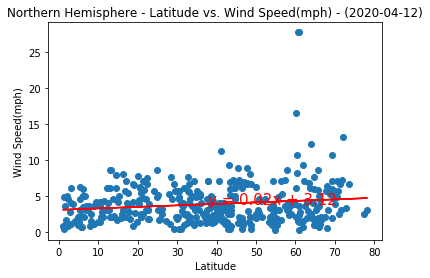

In [390]:
x_values=Northern_Hemisphere["Lat"]
y_values=Northern_Hemisphere["Wind Speed"]
x_label="Latitude"
y_label="Wind Speed(mph)"
Hemisphere="Northern Hemisphere"
linearegress(Hemisphere,x_values,y_values,x_label,y_label)

The r-squared is: 0.061895136965788064


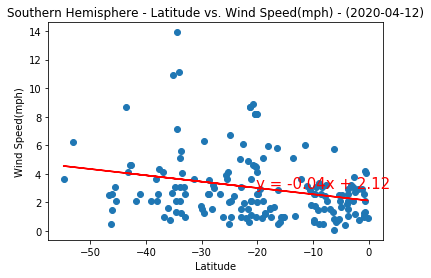

In [391]:
####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values=Southern_Hemisphere["Lat"]
y_values=Southern_Hemisphere["Wind Speed"]
x_label="Latitude"
y_label="Wind Speed(mph)"
Hemisphere="Southern Hemisphere"
linearegress(Hemisphere,x_values,y_values,x_label,y_label)